In [5]:
print (1)

1


In [6]:
import synotil.dio as sdio;reload(sdio)
import synotil as synotil; reload(synotil)
import synotil.qcplots as pkg; reload(pkg)
import synotil.util as sutil;reload(sutil)
import synotil.PanelPlot as spanel;reload(spanel)
import synotil.CountMatrix as scount;reload(scount)

import pymisca.util as pyutil; reload(pyutil)
import pymisca.vis_util as pyvis; reload(pyvis)
import cPickle as pk

testi = 0

np = pyutil.np; pd = pyutil.pd
plt = pyutil.plt; 
get_ipython().magic('matplotlib inline')

# sess = tf

[FAIL] to process index file:/media/pw_synology3/BrachyPhoton/raw/index, due to [Errno 2] No such file or directory: '/media/pw_synology3/BrachyPhoton/raw/index'
[WARN] Cannot find file:key.gene
[WARN] pymisca.vis_util cannot find network
[IMPORT] cannot import "matplotlib_venn"
[WARN] pymisca.vis_util cannot find network
[IMPORT] cannot import "matplotlib_venn"


/home/shouldsee/.local/lib/python2.7/site-packages/pymisca/util.py:11: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/shouldsee/.local/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
 

In [7]:
# modelModule = "pymisca.tensorflow_extra_.matrix_decomp"
# modelModule = "pymisca.tensorflow_extra_.affine_gaussian"
modelModule = "pymisca.tensorflow_extra_.hyper_plane_mixture"
# modelModule = 'pymisca.tensorflow_extra_.gamma_radial_theta'
import importlib
mym = importlib.import_module(name=modelModule,)
reload(mym)

import pymisca.tensorflow_extra as pytf; reload(pytf)
import tensorflow as tf
# sess = pytf.tf.InteractiveSession()

[WARN]unable to import edward.models


In [1]:
import tensorflow as tf
sess=tf.Session() 
signature_key = tf.saved_model.signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY
input_key = 'x'
output_key = 'y'

export_path =  './modeltest'
meta_graph_def = tf.saved_model.loader.load(
           sess,
          [tf.saved_model.tag_constants.SERVING],
          export_path)
signature = meta_graph_def.signature_def

x_tensor_name = signature[signature_key].inputs[input_key].name
y_tensor_name = signature[signature_key].outputs[output_key].name

x = sess.graph.get_tensor_by_name(x_tensor_name)
y = sess.graph.get_tensor_by_name(y_tensor_name)

# y_out = sess.run(y, {x: 3.0})

/home/shouldsee/.local/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


INFO:tensorflow:Restoring parameters from ./modeltest/variables/variables


In [7]:
import synotil.dio as sdio;reload(sdio)
import synotil as synotil; reload(synotil)
import synotil.qcplots as pkg; reload(pkg)
import synotil.util as sutil;reload(sutil)
import synotil.PanelPlot as spanel;reload(spanel)
import synotil.CountMatrix as scount;reload(scount)

import pymisca.util as pyutil; reload(pyutil)
import pymisca.vis_util as pyvis; reload(pyvis)
import cPickle as pk

testi = 0

np = pyutil.np; pd = pyutil.pd
plt = pyutil.plt; 
get_ipython().magic('matplotlib inline')

[WARN] pymisca.vis_util cannot find network
[IMPORT] cannot import "matplotlib_venn"
[WARN] pymisca.vis_util cannot find network
[IMPORT] cannot import "matplotlib_venn"
[FAIL] to process index file:/media/pw_synology3/BrachyPhoton/raw/index, due to [Errno 2] No such file or directory: '/media/pw_synology3/BrachyPhoton/raw/index'
[WARN] Cannot find file:key.gene
[FAIL] to process index file:/media/pw_synology3/BrachyPhoton/raw/index, due to [Errno 2] No such file or directory: '/media/pw_synology3/BrachyPhoton/raw/index'
[WARN] Cannot find file:key.gene
[WARN] pymisca.vis_util cannot find network
[IMPORT] cannot import "matplotlib_venn"
[WARN] pymisca.vis_util cannot find network
[IMPORT] cannot import "matplotlib_venn"


is in ipython: 1 
[WARN]No module named jinja2_util
is in ipython: 1 
[WARN]No module named jinja2_util
is in ipython: 1 
[WARN]No module named jinja2_util
is in ipython: 1 
[WARN]No module named jinja2_util


In [17]:
import pandas as pd
import sklearn.datasets as skdat
data = skdat.load_digits()
data.keys()
# all_data = data['data']
dfcc=  scount.countMatrix(data['data'])
# dfcc = pd.DataFrame(data['data'])

import sklearn.tests as sktest
# sktest
import sklearn.model_selection as skms
kf = skms.KFold(n_splits=3)

all_data= dfcc.values
all_data = sutil.meanNorm(all_data)
# all_data = sutil.meanNorm(all_data.T,).T
# all_data = all_data.T
train_ind, test_ind = next(kf.split(all_data))
train_data = all_data[train_ind]
test_data = all_data[test_ind]
test_targ = data['target'][test_ind]

In [10]:
test_label = sess.run(y,{x:test_data})

In [14]:

def getConfusionMat(mdl=None,pred_targ=None):
    if pred_targ is None:
        pred_targ = mdl.predict(test_data)

    dfc = pd.DataFrame(dict(pred=pred_targ, ground=test_targ))
    dfc['num'] = 1
    confusion = dfc.pivot_table(index='ground',columns='pred',values='num',aggfunc='sum').fillna(0.)
    return confusion

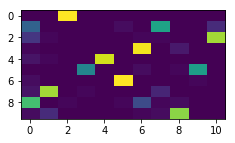

In [19]:
test_label = sess.run(y,{x:test_data}).argmax(axis=1)
confMat = getConfusionMat(pred_targ = test_label)
pyvis.heatmap(confMat)

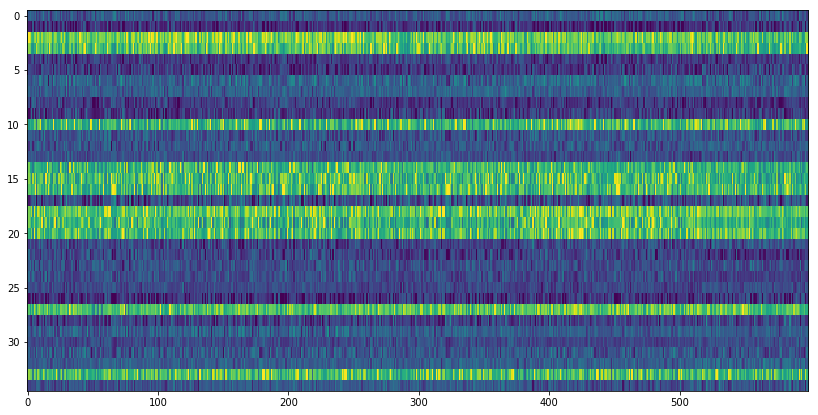

In [13]:
pyvis.heatmap(test_label.T)